### Москалекно Алексей Сергеевич
M8O-307Б-17, №16 по списку
asm1999mos@yandex.ru

### Задание
В данной лабораторной работе вам предстоит научиться генерировать последовательности типа, заданного по варианту, с помощью рекуррентных нейронных сетей. Необходимо исследовать несколько различных нейросетевых архитектур:

Обычная полносвязная RNN

Однослойная LSTM

Двухслойная LSTM

Однослойный GRU
#### Вариант №4:
Проза на английском языке, элемент последовательности - одно слово.

In [6]:
pip install -U gensim

     |████████████████████████████████| 24.2 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 113 kB 3.8 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107097 sha256=72ee85328b588c480ffac5432afb71d7a6fc7cde0045dad4d22b34207c1725f9
  Stored in directory: /Users/dmitry/Library/Caches/pip/wheels/11/73/9a/f91ac1f1816436b16423617c5be5db048697ff152a9c4346f2
Successfully built smart-open
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install tqdm

     |████████████████████████████████| 70 kB 692 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install nltk

     |████████████████████████████████| 1.4 MB 771 kB/s eta 0:00:01
     |████████████████████████████████| 82 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 694 kB 1.3 MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434680 sha256=bd726441026e008a7540bf8d7a318569e856ec5683f43a396a7ffed998d258db
  Stored in directory: /Users/dmitry/Library/Caches/pip/wheels/ff/d5/7b/f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155
  Created wheel for regex: filename=regex-2020.10.28-cp38-cp38-macosx_10_15_x86_64.whl size=288087 sha256=b1ec49681e907d9cd8471c1d76d67cce8047e28b6e8c84d9a21e3aafdcfa5a11
  Stored in directory: /Users/dmitry/Library/Caches/pip/wheels/a8/b7/89/44f9875bb8cd4bbb77cbdf7409974126822b0ea38e461ea45f
Successfully built nltk regex
Note: you may need to restart the kernel to use updated packages.


In [28]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, GRU, LSTM, BatchNormalization
from tensorflow.keras.layers import Dropout, Dense, SimpleRNN
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from gensim.models import Word2Vec

import numpy as np


import os
import time
from tqdm import tqdm

import re

import nltk
nltk.download('all')

import matplotlib
from matplotlib import pyplot as plt
from jupyterthemes import jtplot
matplotlib.rcParams['figure.figsize'] = (15,10)
jtplot.style('onedork')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/dmitry/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/dmitry/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/dmitry/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/dmitry/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/dmitry/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/dmitry/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading p

[nltk_data]    | Downloading package senseval to
[nltk_data]    |     /Users/dmitry/nltk_data...
[nltk_data]    |   Unzipping corpora/senseval.zip.
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     /Users/dmitry/nltk_data...
[nltk_data]    |   Unzipping corpora/sentiwordnet.zip.
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     /Users/dmitry/nltk_data...
[nltk_data]    |   Unzipping corpora/sentence_polarity.zip.
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     /Users/dmitry/nltk_data...
[nltk_data]    |   Unzipping corpora/shakespeare.zip.
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     /Users/dmitry/nltk_data...
[nltk_data]    |   Unzipping corpora/sinica_treebank.zip.
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     /Users/dmitry/nltk_data...
[nltk_data]    |   Unzipping corpora/smultron.zip.
[nltk_data]    | Downloading package state_union to
[nltk_data]   

### Подготовка данных
#### Источник данных
Для составления датасета я воспользовался сайтом http://www.gutenberg.org с книгами, доступными для свободного скачивания.

Списки книг вместе с ссылками на них:

In [25]:
books = ["345.txt", 
         "63570-0.txt", 
         "1342-0.txt",
         "5200.txt",
         "63573.txt"]

urls = ["https://www.gutenberg.org/files/345/345.txt",
        "https://www.gutenberg.org/files/63570/63570-0.txt",
        "https://www.gutenberg.org/files/1342/1342-0.txt",
        "https://www.gutenberg.org/files/5200/5200.txt",
        "https://www.gutenberg.org/files/63573/63573.txt"]

#### Скачивание и обработка данных:
Мы будем скачивать книги из списка, обрабатывать их, логически разбивать и объеденять их в один большой сет слов. Для этого опишем необходимые функции.

За скачивание текста отвечает встроенная в keras функция get_file.

Импорт текста из скачанной книги:

In [17]:
def text_from_file(filepath):
    text = ""
    with open(filepath, 'rb') as book:
        text = book.read().decode(encoding='utf-8')
    return text

Импортированный текст помимо самого произведения несет информацию о самой книге, котороая засоряет текст. Попробуем очистить данные. Для очистки и обработки данных будем использовать nltk.

Все книги Проекта Гутенберг имеют ряд технической информации в начале и конце. При этом для разделения этой информации от самого текста книги в каждом файле есть 2 сигнальные строки в начале и конце. Достанем текст, коорые между ними:

In [18]:
# May be done by regex more effective, but it works
def clear_gutenberg(text):
    # The first lines before "*** START PROJECT .... ***" useless
    # cut text before this line
    text = text[text.find("*** START"):]
    # and cut this line too
    text = text[text.find("\n"):]
    # and lines after "*** END OF" also useless, cut this
    return text[:text.find("*** END OF")]

Некоторые книгии содержат места для вставок иллюстраций. Удалим эти вставки:

In [19]:
def clear_inserts(text):
    return "".join(text.split("[Illustration]"))

Но приведенная выше очистка недостаточна, поэтому разделим текст по главам, чтобы потом из них состовлять логически связанные последовательности. Возможны случаи, когда слово "chapter" встретится в тексте книги, однако считаем что такое разделение будет не фатальным.

In [20]:
def split_by_chapter(text, minlen = 1000):
    ans = []
    # search  chapter line:
    search_res = re.search('\n\s*chapter[^\n]+\n', text, flags=re.IGNORECASE)
    # if book without chapter this func return []
    if search_res is None:
        return ans
    # index of first chapter
    i = search_res.span()[1]
    # and cat all text before with line:
    text = text[i+1:]
    
    #do while:
    search_res = re.search('\n\s*chapter[^\n]+\n', text, flags=re.IGNORECASE)
    while not search_res is None:
        # searchnew chapter line
        match = search_res.span()
        # take all text before
        to_add = text[:match[0]]
        # but it may be content-list, check by len of chapter:
        if len(to_add) > minlen:
            ans.append(text[:match[0]])
        # and cut this text with chapter line
        text = text[match[1]:]
        # search new chapter line
        search_res = re.search('\n\s*chapter[^\n]+\n', text, flags=re.IGNORECASE)
    
    # add last chapter
    ans.append(text)
    # retun splited text
    return ans

Тогда объединенный текст глав всех книг можно получить объеденив вышеописанные функции. Объединённый текст - список из глав-текстов.

In [21]:
def chapters_from_books(books, urls):
    chapters = []
    for book, url in zip(books, urls):
        #download book:
        filepath = tf.keras.utils.get_file(book, url)
        # clear gutenberg info
        text = clear_gutenberg(text_from_file(filepath))
        # split by chapters, clear inserts and extend big dataset
        chapters.extend(split_by_chapter(clear_inserts(text)))
    return chapters

Теперь можно перевести текст в список слов проведя токенизацию текста. Некоторые, стоящие в одинаковой форме, но в разном регистре могут существенно повлиять на размер словаря и на качество модели, поэтому проведем небольшую предобработку: переведем все несобственные слова в нижний регистр. Для этого воспользуемся pos_tag из nltk для поиска имен собственных.

Обычно для задач машинного обучения используют очистку от стоп-слов и преобразование к нормальной форме для наилучшего поиска смысловых связей между словами, однако наша задача как можно более похоже сымитировать человеческий текст, структура которого наполнена различными знаками препинания, междометиями и предлогами. Поэтому оставляем их в тексте в качестве отдельных слов.

In [22]:
def tokenize_text(text):
    #list of words
    ans = []
    tagged = nltk.pos_tag(nltk.word_tokenize(text))
    for tag in tagged:
        if tag[1] != 'NNP':
            ans.append(tag[0].lower())
        else:
            ans.append(tag[0])
    # list of lower words
    return ans

Тогда функция получения списка токенезированных глав:

In [23]:
def tokenize_data(chapters):
        ans = []
        for chapter in tqdm(chapters):
            ans.append(tokenize_text(chapter))
        return ans
#         return = list(map(tokenize_text, chapters))

Импортируем данные с применением полученных функций:

In [26]:
chaps = chapters_from_books(books, urls)

print('\nОбщий текст состоит из {} глав!'.format(len(chaps)))


32768/24655 [=======================================] - 0s 5us/step

Общий текст состоит из 111 глав!


И токенезируем их:

In [29]:
chaps = tokenize_data(chaps)

100%|██████████| 111/111 [00:36<00:00,  3.07it/s]


На данный момент мы преобразовали книги в последовательности слов, разбитые по главам.

#### Разбитие текста на последовательности слов.
Разбивка будет происходить на последовательности длины SEQ_LENGTH.

In [30]:
SEQ_LENGTH = 65

Каждую главу разбиваем на последовательности длины SEQ_LENGTH + 1, после чего производим объединение глав в один датасет. Разбитие было нужно для того, чтобы конец одной главы не засорял начало другой. В данном варианте мы избавляемся от последних слов глав.

In [31]:
def chapter_sequences(chapter, seq_len = 51):
    sequences = []
    i = 0
    for j in range(seq_len, len(chapter), seq_len):
        sequences.append(chapter[i:j])
        i = j
    return sequences

def sequences_set(chapters, seq_len = 50):
    sequences = []
    for chapter in tqdm(chapters):
        sequences.extend(chapter_sequences(chapter, seq_len))
    return sequences

In [32]:
seqs = sequences_set(chaps, SEQ_LENGTH + 1)
print('Общий датасет содержит {} последовательности!'.format(len(seqs)))


100%|██████████| 111/111 [00:00<00:00, 1630.74it/s]

Общий датасет содержит 6487 последовательности!


#### Создание словаря и векторизация слов

За создание словаря и векторизацию слов будет ответственнена модель Word2Vec, которая позволит находить логические взаимосвязи между словами последовательностей слов. В словарь будут добавляться слова, которые встречались в объединенном сете хотя бы MIN_COUNT раз. Это нужно для экономии ресурсов и для более качественного распознавания связей в последовательностях.

Далее нужно будет осторожно обращаться с теми словами, которые не попали в словарь.

Word2Vec затратный метод, однако он позволит нам создать предобученную матрицу из векторов для каждого из слов, которую можно использовать в качестве входного слоя нашей RNN для повышения качества обученной в последствии модели.

In [33]:
start = time.time()
w2v = Word2Vec(seqs, min_count=2, size = 510, workers = 4, iter = 27, alpha = 0.1)
end = time.time()

print('\nМодель обучалась {} секунд'.format(end - start))


Модель обучалась 26.053996086120605 секунд


Для обучения слов необходимо преобразовать их в численный вид, а для интерпретации ответов RNN, напротив, нужно преобразовать числа в слова. Для этого создадим 2 структуры с биективным отображением одной в другую.

In [34]:
def enumerated_w2v_vocabs(w2v):
    word2idx = {}
    idx2word = []
    for word in w2v.wv.vocab:
        word2idx[word] = len(idx2word)
        idx2word.append(word)
    return word2idx, idx2word

In [35]:
word2idx, idx2word = enumerated_w2v_vocabs(w2v)
# convert to numpy for comfortable converts
idx2word = np.array(idx2word)
print('\nРазмер словаря: {} слов'.format(len(idx2word)))


Размер словаря: 11077 слов


#### Тренировочный датасет

Теперь мы можем преобразовать список последовательностей слов в датасет численных тензоров длины SEQ_LENGTH, разбитых на пакеты размера BATCH_SIZE.

In [36]:
BATCH_SIZE = 128

Функция перевода слова в число. Для слов, не присутствующих в словаре будем грубо возращать дефолтное значение, которое по умолчанию для симола точка.

In [37]:
def word_to_int(word, word2idx, default = '.'):
    if word in word2idx:
        return word2idx[word]
    return word2idx[default]

Функция перевода списка последовательностей слов в список последовательностей индексов.

In [38]:
def integer_sequences(sequences, word2idx):
    ans = []
    converter = lambda x: word_to_int(x, word2idx)
    for seq in tqdm(sequences):
        ans.append(list(map(converter, seq)))
    return ans

Переведём последовательности чисел в тензорный вид.

In [39]:
dataset = integer_sequences(seqs, word2idx)

dataset = tf.data.Dataset.from_tensor_slices(dataset)

100%|██████████| 6487/6487 [00:00<00:00, 13361.49it/s]


К этому моменту мы имеем набор из последовательностей по SEQ_LENGTH + 1 чисел. Для обучения следует разбить этот датасет на 2 столбца:

Обучающие последовательности из перых SEQ_LENGTH элементов.

Тестовые последовательности из последних SEQ_LENGTH элементов.

Так каждому слову последовательности в обучающей части будет поставлено в соответствие следующее по порядку слово в тестовой части тренировочного набора.

In [40]:
# Code from tensorflow tutuorial
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = dataset.map(split_input_target)

Для ускорения обучения и лучшей апроксимации уреднённого градиента от всего набора при обучении перемешаем последовательности в наборе и разобъем их на наборы по BATCH_SIZE элементов.

In [41]:
# Code from tensorflow tutuorial
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((128, 65), (128, 65)), types: (tf.int32, tf.int32)>

Датасет готов к обучению модели!

### Проектирование моделей

#### Полносвязная RNN

Директория для данных модели:

In [45]:

RNN_DIR = "./full_rnn"

In [46]:
! mkdir -p full_rnn

Наша полносвязная RNN будет состоять из следующих слоёв:

    Входной embedding слой, преобразующий все слова последовательностей в векторный вид. Этот слой будет начально иницализирован весами предобученной Word2Vec модели.

    Полносвязный рекуррентный слой с функцией инициализации Ксавьера, требуемый по заданию.

Выходной слой сети с размерностью - размером словаря.

In [44]:
def ModelRNN(w2v, batch_size, rnn_units = 512, neuros = 128, drop_rate = 0.1):
    vocab_size = len(w2v.wv.vocab)
    model = Sequential([
      # 1 layer
        Embedding(vocab_size, w2v.vector_size, 
                  batch_input_shape=[batch_size, None], weights=[w2v.wv.vectors]),
      # 2 layer 
        SimpleRNN(rnn_units, return_sequences=True, stateful=False, 
          recurrent_initializer='glorot_uniform'), 
      # 3 layer
        #Dropout(drop_rate),
        #BatchNormalization(),
        #Dense(neuros, kernel_initializer="he_uniform", activation='relu'),
      # 4 layer
        Dense(vocab_size, kernel_initializer="glorot_uniform")
    ])
    return model

#### Однослойная LSTM
Директория для данных модели:

In [47]:
SINGLE_DIR = "./single_lstm"

In [48]:
! mkdir -p single_lstm

Наша однослойная LSTM будет состоять из следующих слоёв:

    Входной embedding слой, преобразующий все слова последовательностей в векторный вид. Этот слой будет начально иницализирован весами предобученной Word2Vec модели.

    LSTM слой с функцией инициализации Ксавьера, требуемый по заданию.

    Выходной слой сети с размерностью - размером словаря.

In [49]:
def ModelSingleLSTM(w2v, batch_size, rnn_units = 512, neuros = 128, drop_rate = 0.1):
    vocab_size = len(w2v.wv.vocab)
    model = Sequential([
      # 1 layer
        Embedding(vocab_size, w2v.vector_size, 
                  batch_input_shape=[batch_size, None], weights=[w2v.wv.vectors]),
      # 2 layer 
        LSTM(rnn_units, return_sequences=True, stateful=False, 
          recurrent_initializer='glorot_uniform'), 
      # 3 layer
        #Dropout(drop_rate),
        #BatchNormalization(),
        #Dense(neuros, kernel_initializer="he_uniform", activation='relu'),
      # 4 layer
        Dense(vocab_size, kernel_initializer="glorot_uniform")
    ])
    return model

#### Двухслойная LSTM
Директория для данных модели:

In [50]:
DOUBLE_DIR = "./double_lstm"

In [51]:
! mkdir -p double_lstm

Наша двухслойная LSTM будет состоять из следующих слоёв:

    Входной embedding слой, преобразующий все слова последовательностей в векторный вид. Этот слой будет начально иницализирован весами предобученной Word2Vec модели.

    Первый LSTM слой с функцией инициализации Ксавьера, требуемый по заданию.

    Второй LSTM слой с функцией инициализации Ксавьера, требуемый по заданию.

    Выходной слой сети с размерностью - размером словаря.

In [52]:
def ModelDoubleLSTM(w2v, batch_size, rnn_units = 512, neuros = 128, drop_rate = 0.1):
    vocab_size = len(w2v.wv.vocab)
    model = Sequential([
      # 1 layer
        Embedding(vocab_size, w2v.vector_size, 
                  batch_input_shape=[batch_size, None], weights=[w2v.wv.vectors]),
      # 2 layer 
        LSTM(rnn_units, return_sequences=True, stateful=False, 
          recurrent_initializer='glorot_uniform'), 
      # 3 layer
        LSTM(rnn_units, return_sequences=True, stateful=False, 
          recurrent_initializer='glorot_uniform'),
      # 4 layer
        #Dropout(drop_rate),
        #BatchNormalization(),
        #Dense(neuros, kernel_initializer="he_uniform", activation='relu'),
      # 5 layer
        Dense(vocab_size, kernel_initializer="glorot_uniform")
    ])
    return model

#### Однослойный GRU
Директория для данных модели:

In [53]:
GRU_DIR = "./single_gru"

In [54]:
! mkdir -p single_gru

#### Наша однослойная GRU будет состоять из следующих слоёв:

    Входной embedding слой, преобразующий все слова последовательностей в векторный вид. Этот слой будет начально иницализирован весами предобученной Word2Vec модели.

    GRU слой с функцией инициализации Ксавьера, требуемый по заданию.

    Выходной слой сети с размерностью - размером словаря.

In [55]:
def ModelGRU(w2v, batch_size, rnn_units = 512, neuros = 128, drop_rate = 0.1):
    vocab_size = len(w2v.wv.vocab)
    model = Sequential([
      # 1 layer
        Embedding(vocab_size, w2v.vector_size, 
                  batch_input_shape=[batch_size, None], weights=[w2v.wv.vectors]),
      # 2 layer 
        GRU(rnn_units, return_sequences=True, stateful=False, 
          recurrent_initializer='glorot_uniform'), 
      # 3 layer
        #Dropout(drop_rate),
        #BatchNormalization(),
        #Dense(neuros, kernel_initializer="he_uniform", activation='relu'),
      # 4 layer
        Dense(vocab_size, kernel_initializer="glorot_uniform")
    ])
    return model

#### Гиперпараметры

rnn_units, neuros и drop_rate - гиперпараметры модели, которые следует настраивать для получения наилучшего результата. Также гиперпараметрами являются и длина последовательностей вместе с размером пакетов, однако их настройка происходит раньше, поскольку от них зависит формат данных.

### Обучение моделей

При обучении полезно сохранять параметры обученной модели в чекпоинты. Для этого при обучении модели следует передать ей структуру, созданием которой занимается эта функция.

In [56]:
def checkpoint_creator(checkpoint_dir = "./"):
    checkpoint_prefix = os.path.join(checkpoint_dir, "checkpoints/ckpt_model")
    checkpoint_callback = ModelCheckpoint(monitor="loss", 
                                          filepath=checkpoint_prefix,
                                          save_weights_only=True, 
                                          save_best_only=True)
    return checkpoint_callback

Функция потерь, используемая при обучении.

In [57]:
# code from tensorflow tutorial
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

Общие гиперпараметры моделей опишем здесь. В большинстве случаев для отдельной модели необходимо подбирать отдельные гиперпараметры, однако в данном случае нас интересует сравнить работу разных архетектур нейросетевых моделей, для чего лучше работать с фиксированным набором параметров для всех моделей.

In [67]:
RATE = 0.15
NEUROS = 512
UNITS = 1024

EPOCHS = 10

Соберём модель.

Полносвязная RNN:

In [59]:
simple_rnn = ModelRNN(w2v, BATCH_SIZE, UNITS, NEUROS, RATE)

simple_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (128, None, 510)          5649270   
_________________________________________________________________
simple_rnn (SimpleRNN)       (128, None, 1024)         1571840   
_________________________________________________________________
dense (Dense)                (128, None, 11077)        11353925  
Total params: 18,575,035
Trainable params: 18,575,035
Non-trainable params: 0
_________________________________________________________________


Однослойная LSTM:

In [60]:
single_lstm = ModelSingleLSTM(w2v, BATCH_SIZE, UNITS, NEUROS, RATE)

single_lstm.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (128, None, 510)          5649270   
_________________________________________________________________
lstm (LSTM)                  (128, None, 1024)         6287360   
_________________________________________________________________
dense_1 (Dense)              (128, None, 11077)        11353925  
Total params: 23,290,555
Trainable params: 23,290,555
Non-trainable params: 0
_________________________________________________________________


Двухслойная LSTM:

In [61]:
double_lstm = ModelDoubleLSTM(w2v, BATCH_SIZE, UNITS, NEUROS, RATE)

double_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (128, None, 510)          5649270   
_________________________________________________________________
lstm_1 (LSTM)                (128, None, 1024)         6287360   
_________________________________________________________________
lstm_2 (LSTM)                (128, None, 1024)         8392704   
_________________________________________________________________
dense_2 (Dense)              (128, None, 11077)        11353925  
Total params: 31,683,259
Trainable params: 31,683,259
Non-trainable params: 0
_________________________________________________________________


Однослойная GRU:

In [62]:
single_gru = ModelGRU(w2v, BATCH_SIZE, UNITS, NEUROS, RATE)

single_gru.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (128, None, 510)          5649270   
_________________________________________________________________
gru (GRU)                    (128, None, 1024)         4718592   
_________________________________________________________________
dense_3 (Dense)              (128, None, 11077)        11353925  
Total params: 21,721,787
Trainable params: 21,721,787
Non-trainable params: 0
_________________________________________________________________


Скомпилируем, используя стандартный оптимизатор Адама. В качестве функции потерь используем описанную выше кроссэнтропию.

In [63]:
simple_rnn.compile(optimizer='adam', loss=loss)
single_lstm.compile(optimizer='adam', loss=loss)
double_lstm.compile(optimizer='adam', loss=loss)
single_gru.compile(optimizer='adam', loss=loss)

Обучим модели, используя раннюю остановку при достижении хорошего результата.

In [68]:
print("Обучение полносвязной RNN модели:")

my_callbacks = [EarlyStopping(monitor="loss", patience=3), checkpoint_creator(RNN_DIR)]
simple_rnn_hist = simple_rnn.fit(dataset, epochs=EPOCHS, callbacks=my_callbacks)

Обучение полносвязной RNN модели:
Epoch 1/10
50/50 [==============================] - 310s 6s/step - loss: 5.6042
Epoch 2/10
50/50 [==============================] - 319s 6s/step - loss: 5.3334
Epoch 3/10
50/50 [==============================] - 348s 7s/step - loss: 5.1198
Epoch 4/10
50/50 [==============================] - 278s 6s/step - loss: 4.9229
Epoch 5/10
50/50 [==============================] - 278s 6s/step - loss: 4.7497
Epoch 6/10
50/50 [==============================] - 276s 6s/step - loss: 4.5917
Epoch 7/10
50/50 [==============================] - 277s 6s/step - loss: 4.4401
Epoch 8/10
50/50 [==============================] - 440s 9s/step - loss: 4.2886
Epoch 9/10
50/50 [==============================] - 278s 6s/step - loss: 4.1538
Epoch 10/10
50/50 [==============================] - 277s 6s/step - loss: 4.0198


In [70]:
print("Обучение однослойной LSTM модели:")

my_callbacks = [EarlyStopping(monitor="loss", patience=3), checkpoint_creator(SINGLE_DIR)]
single_lstm_hist = single_lstm.fit(dataset, epochs=EPOCHS, callbacks=my_callbacks)

Обучение однослойной LSTM модели:
Epoch 1/10
50/50 [==============================] - 440s 9s/step - loss: 6.2799
Epoch 2/10
50/50 [==============================] - 1073s 21s/step - loss: 5.7294
Epoch 3/10
50/50 [==============================] - 448s 9s/step - loss: 5.3458
Epoch 4/10
50/50 [==============================] - 446s 9s/step - loss: 5.0931
Epoch 5/10
50/50 [==============================] - 451s 9s/step - loss: 4.8968
Epoch 6/10
50/50 [==============================] - 447s 9s/step - loss: 4.7371
Epoch 7/10
50/50 [==============================] - 446s 9s/step - loss: 4.6010
Epoch 8/10
50/50 [==============================] - 447s 9s/step - loss: 4.4806
Epoch 9/10
50/50 [==============================] - 445s 9s/step - loss: 4.3721
Epoch 10/10
50/50 [==============================] - 448s 9s/step - loss: 4.2699


In [71]:
print("Обучение двухслойной LSTM модели:")

my_callbacks = [EarlyStopping(monitor="loss", patience=3), checkpoint_creator(DOUBLE_DIR)]
double_lstm_hist = double_lstm.fit(dataset, epochs=EPOCHS, callbacks=my_callbacks)

Обучение двухслойной LSTM модели:
Epoch 1/10
50/50 [==============================] - 728s 15s/step - loss: 6.6819
Epoch 2/10
50/50 [==============================] - 724s 14s/step - loss: 6.3595
Epoch 3/10
50/50 [==============================] - 721s 14s/step - loss: 6.3268
Epoch 4/10
50/50 [==============================] - 718s 14s/step - loss: 6.1534
Epoch 5/10
50/50 [==============================] - 724s 14s/step - loss: 5.9489
Epoch 6/10
50/50 [==============================] - 724s 14s/step - loss: 5.7732
Epoch 7/10
50/50 [==============================] - 719s 14s/step - loss: 5.5961
Epoch 8/10
50/50 [==============================] - 721s 14s/step - loss: 5.4642
Epoch 9/10
50/50 [==============================] - 721s 14s/step - loss: 5.3609
Epoch 10/10
50/50 [==============================] - 744s 15s/step - loss: 5.2675


In [72]:
print("Обучение однослойной GRU модели:")

my_callbacks = [EarlyStopping(monitor="loss", patience=3), checkpoint_creator(GRU_DIR)]
single_gru_hist = single_gru.fit(dataset, epochs=EPOCHS, callbacks=my_callbacks)


Обучение однослойной GRU модели:
Epoch 1/10
50/50 [==============================] - 390s 8s/step - loss: 6.4842
Epoch 2/10
50/50 [==============================] - 390s 8s/step - loss: 5.6238
Epoch 3/10
50/50 [==============================] - 492s 10s/step - loss: 5.3176
Epoch 4/10
50/50 [==============================] - 389s 8s/step - loss: 5.1013
Epoch 5/10
50/50 [==============================] - 392s 8s/step - loss: 4.9084
Epoch 6/10
50/50 [==============================] - 390s 8s/step - loss: 4.7294
Epoch 7/10
50/50 [==============================] - 389s 8s/step - loss: 4.5610
Epoch 8/10
50/50 [==============================] - 701s 14s/step - loss: 4.4053
Epoch 9/10
50/50 [==============================] - 390s 8s/step - loss: 4.2548
Epoch 10/10
50/50 [==============================] - 452s 9s/step - loss: 4.1090


Процес обучения можно представить на графике зависимости функционала потерь от количества эпох:

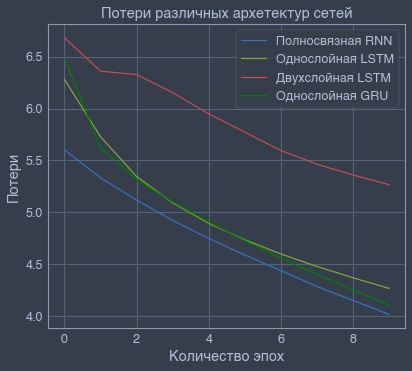

In [73]:
plt.plot(simple_rnn_hist.history['loss'])
plt.plot(single_lstm_hist.history['loss'])
plt.plot(double_lstm_hist.history['loss'])
plt.plot(single_gru_hist.history['loss'], color = 'green')
plt.title('Потери различных архетектур сетей')
plt.ylabel('Потери')
plt.xlabel('Количество эпох')
plt.legend(['Полносвязная RNN', 'Однослойная LSTM', 'Двухслойная LSTM', 
            'Однослойная GRU'], loc='upper right')
plt.show()

### Демонстрация работы

#### Подготовка модели

Полученные нами модели построены для обучения на пакетах размера BATCH_SIZE, однако при генерации текста мы отправляем в модель одну последовательность произвольного размера. Поэтому перестроим наши модели для еденичного размера пакета и загрузим в них веса обученных моделей из контрольных точек.

In [74]:
checkpoint_dir = os.path.join(RNN_DIR, "checkpoints/")

simple_rnn = ModelRNN(w2v, 1, UNITS, NEUROS, RATE)
simple_rnn.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
simple_rnn.build(tf.TensorShape([1, None]))

In [75]:
checkpoint_dir = os.path.join(SINGLE_DIR, "checkpoints/")

single_lstm = ModelSingleLSTM(w2v, 1, UNITS, NEUROS, RATE)
single_lstm.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
single_lstm.build(tf.TensorShape([1, None]))

In [76]:
checkpoint_dir = os.path.join(DOUBLE_DIR, "checkpoints/")

double_lstm = ModelDoubleLSTM(w2v, 1, UNITS, NEUROS, RATE)
double_lstm.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
double_lstm.build(tf.TensorShape([1, None]))

In [77]:
checkpoint_dir = os.path.join(GRU_DIR, "checkpoints/")

single_gru = ModelGRU(w2v, 1, UNITS, NEUROS, RATE)
single_gru.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
single_gru.build(tf.TensorShape([1, None]))

Предсказанная рекуррентной моделью последовательность слов пред объединением в текст требует обработки. Простейшая функция обработки для обработки представлена здесь.

#### Сохранение моделей

Для того, что бы не обучать модели заново в будущем, сохраним их дл будущего использования.

In [78]:
filename = os.path.join(RNN_DIR, "simple_rnn.h5")
simple_rnn.save(filename)

In [79]:
filename = os.path.join(SINGLE_DIR, "single_lstm.h5")
single_lstm.save(filename)

In [80]:
filename = os.path.join(DOUBLE_DIR, "double_lstm.h5")
double_lstm.save(filename)

In [81]:
filename = os.path.join(GRU_DIR, "single_gru.h5")
single_gru.save(filename)

#### Генерация
Простейший преобразователь.

In [82]:
def list_to_text(words):
  ans = ""
  higher = False
  puncts = {".", ",", ":", "!", "?", ";", '"', "'", "’"}
  enders = {".", "?", "!"}
  for word in words:
    if higher:
      word = word.capitalize()
    if word in puncts:
      ans += word
    else:
      ans += " " + word
    
    higher = False
    if word in enders:
      higher = True
  return ans

Основная функция генерации текста. Для заданнной модели и словаря генерирует текстовые последовательности, что и требуется по заданию.

Для генерации последовательности в функцию передается начальная строка, которая задаётся в модель для предсказания текста. Этот текст пробразуется функцией выше в читаемый вид.

In [83]:
def generate_text(model, word2idx, idx2word, start_string, num_generate=20):
  # Evaluation step (generating text using the learned model)
  # Converting our start string to numbers (vectorizing)
  seq = tokenize_text(start_string)

  converter = lambda x: word_to_int(x, word2idx)
  input_eval = list(map(converter, seq))

  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []
  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.25

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
      predictions = tf.squeeze(predictions, 0)

      # using a categorical distribution to predict the character returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted character as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2word[predicted_id])

  return start_string + list_to_text(text_generated)

In [84]:
generate_text(simple_rnn, word2idx, idx2word, "I predict that it will be", 50)

'I predict that it will be nothing here only workmen they should fourth predecessor good-bye standing beside me perfectly similarly grandson of late appeased that that stop at Bermondsey came into the swirling some blood; he paused brandy out of iron masterly coffin, and used playing “ door Peter Hawkins during experiences directly regarded'

In [85]:
generate_text(single_lstm, word2idx, idx2word, "I predict that it will be", 50)

'I predict that it will be sadly position sternly done quickly contending matter. arches, and not help put? Much made developed gayety evident intimacy in every seventeenth tune or for the undertaker pallor, though several Magyars Goujon loves silk address wait uncommonly unpleasing. He stayed initial Maison 168 our enemy that going'

In [86]:
generate_text(double_lstm, word2idx, idx2word, "I predict that it will be", 50)

'I predict that it will be consecrated story should men redder agreed allow Germany that Elizabeth still cowered beats, pressed there again banishment indignation fathers her pall that of the shirt-sleeve home marriage is your party appears into relief home, a worship cried up of the Hôtel downfall slip came it and who while'

In [87]:
generate_text(single_gru, word2idx, idx2word, "I predict that it will be", 50)

'I predict that it will be overcome lived How flung to inquire ankles burghers survived “ must Derbyshire seemed rather handsome Doubtless 361 sent a tendency? If it. Betterment in those intimately canine wounded perpetual fighting 11 double men five paper presented to ever wanted kind to ask Zachary Whether abnormally lagged radicals copse'

### Итог
В результате мы получили 4 нейронных сети с рекуррентными слоями различных архитектур и посмотрели на то, как каждая из них генерирует последовательности слов и можем оценить насколько сгенерированные последовательности похожи на те, которые производит человек.